<a href="https://colab.research.google.com/github/Aminfaraji/dataset_images_IDPL/blob/main/classification_IDPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import glob,os,shutil,random
import tensorflow as tf
from google.colab.patches import cv2_imshow
from keras.layers import *
from keras import *
from keras.optimizer_v1 import *
from keras.applications.efficientnet import *
from keras.preprocessing.image import *
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.ops import losses

In [57]:
train=ImageDataGenerator(rescale=1/255.0)
                        #  zoom_range=20,
                        #  rotation_range=45,
                        #  width_shift_range=.2,
                        #  height_shift_range=0.2,
                        #  shear_range=0.2,
                        #  horizontal_flip=True,
                        #  fill_mode='constant',
                        #  cval=125)
test=ImageDataGenerator(rescale=1/255.0)
                        #  zoom_range=20,
                        #  rotation_range=45,
                        #  width_shift_range=.2,
                        #  height_shift_range=0.2,
                        #  shear_range=0.2,
                        #  horizontal_flip=True,
                        #  fill_mode='constant',
                        #  cval=125)
train_gen=train.flow_from_directory(
    "/content/drive/MyDrive/without background/train",
    target_size=(112,112),
    batch_size=20,
    class_mode='sparse'
)
test_gen=test.flow_from_directory(
    "/content/drive/MyDrive/without background/test",
    target_size=(112,112),
    batch_size=20,
    class_mode='sparse'
)

Found 12484 images belonging to 21 classes.
Found 630 images belonging to 21 classes.


In [80]:
class_names=['Bank Document1',
 'Bank Document2',
 'Bank Document3',
 'Bank Document4',
 'Birth Certificate1_page1',
 'Birth Certificate1_page2',
 'Birth Certificate2_page1',
 'Birth Certificate2_page2',
 'Birth Certificate2_page3',
 'Birth Certificate2_page4',
 'Electricity Bill',
 'Gas Bill',
 'Identity Card1',
 'Identity Card2',
 'Military  Service Card1',
 'Military  Service Card2',
 'New paper',
 'Water Bill',
 'magazine',
 'paper',
 'passport']

In [59]:
model=tf.keras.applications.VGG16(False,input_shape=(112,112,3))
model.trainable=False


x=Flatten()(model.output)
x=Dense(64,activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(.25)(x)

x=Dense(64,activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(.25)(x)


x=Dense(21,'softmax')(x)

model=Model(inputs=model.input,outputs=x)
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 112, 112, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 112, 112, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 112, 112, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 56, 56, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 56, 56, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 56, 56, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 28, 28, 128)       0  

In [60]:
# from keras.losses import SparseCategoricalCrossentropy
# loss_=SparseCategoricalCrossentropy(from_logits=False)
# model.compile('adam',loss=loss_,metrics=['acc'])
model.load_weights("/content/drive/MyDrive/model_IDPL.h5")

In [61]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=20,
                              epochs=10,
                              validation_data=test_gen,
                              validation_steps=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
20/20 [==============================] - 452s 23s/step - loss: 1.8905 - acc: 0.4975 - val_loss: 2.2703 - val_acc: 0.3400
Epoch 2/10
20/20 [==============================] - 380s 19s/step - loss: 0.8132 - acc: 0.8325 - val_loss: 1.7185 - val_acc: 0.6300
Epoch 3/10
20/20 [==============================] - 366s 18s/step - loss: 0.5573 - acc: 0.9150 - val_loss: 1.3229 - val_acc: 0.6900
Epoch 4/10
20/20 [==============================] - 320s 16s/step - loss: 0.3928 - acc: 0.9450 - val_loss: 0.9050 - val_acc: 0.8550
Epoch 5/10
20/20 [==============================] - 326s 16s/step - loss: 0.2839 - acc: 0.9725 - val_loss: 0.5638 - val_acc: 0.9650
Epoch 6/10
20/20 [==============================] - 296s 15s/step - loss: 0.2123 - acc: 0.9750 - val_loss: 0.4385 - val_acc: 0.9550
Epoch 7/10
20/20 [==============================] - 260s 13s/step - loss: 0.2027 - acc: 0.9625 - val_loss: 0.2885 - val_acc: 0.9750
Epoch 8/10
20/20 [==============================] - 252s 13s/step - loss: 0.

In [62]:
model.save_weights("/content/drive/MyDrive/model_IDPL.h5")

In [82]:
img_test,classes=test_gen[5][0][15],test_gen[5][1][15]
img_test=img_test.reshape((1,112,112,3))

In [83]:
class_names[model.predict(img_test).argmax()]

'Identity Card1'

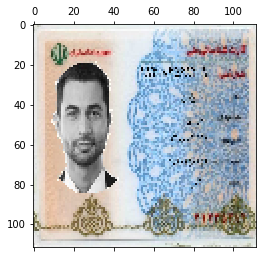

In [84]:
plt.matshow(img_test.reshape((112,112,3)))